# 1DTFIM - Inference (10k samples)

This notebook is part of the work arXiv:2505.22083 (https://arxiv.org/abs/2505.22083), "Hyperbolic recurrent neural network as the first type of non-Euclidean neural quantum state ansatz". Code written by HLD. 

In this notebook, I load the trained models to check the ground state energy produced by each trained model. The system size is N=20,40,80,100. Jz =1, Bx = 1 for all settings.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../../utility')
from hyprnn_wf import *
from tfim_hyprnn_train_loop import *

nk = 10000

2025-11-27 17:02:26.311289: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  0


In [2]:
#Original versions when the work was done: ('2.16.2', '3.5.0')
# Due to system updates, Keras version got automatically updated to 3.10.0. Re-install 3.5.0 
tf.__version__, keras.__version__

('2.16.2', '3.4.1')

In [2]:
def define_load_test(wf, numsamples, weight_link):
    test_samples_before = wf.sample(numsamples,2)
    print(f'The length of the test samples is {len(test_samples_before)}')
    test_gs_before = Ising_local_energies(Jz, Bx, test_samples_before, wf)
    gs_mean_b = np.mean(test_gs_before)
    gs_var_b = np.var(test_gs_before)
    print(f'Before loading weights, the ground state energy mean and variance are:')
    print(f'Mean E = {np.round(gs_mean_b,4)}, var E = {np.round(gs_var_b,4)}')
    print('====================================================================')
    wf.model.load_weights(weight_link)
    test_samples_after = wf.sample(numsamples,2)
    print(f'The length of the test samples after loading the weights is {len(test_samples_after)}')
    test_gs_after = Ising_local_energies(Jz, Bx, test_samples_after, wf)   
    #print(test_gs_after)
    gs_mean_a = np.mean(test_gs_after)
    gs_var_a = np.var(test_gs_after)
    
    #wf.model.summary()
    #print('====================================================================')
    print(f'After loading weights, the ground state energy mean and variance are:')
    print(f'Mean E = {np.round(gs_mean_a,4)}, var E = {np.round(gs_var_a,4)}')

# N=20, E = -25.1078

In [3]:
ssize = 20
units = 50
Jz = +np.ones(ssize)
Bx = 1.0
#Exact energy by DMRG
Ee_20 = -25.107797
numsamples = nk
print(f'THE NUMBER OF SAMPLES USED FOR ESTIMATION IS {numsamples}')

THE NUMBER OF SAMPLES USED FOR ESTIMATION IS 10000


In [4]:
print('EUCLIDEAN RNN')
t1 = time.time()
wf_n20ernn = rnn_eucl_wf(ssize, 'EuclRNN', units)
weight_link ='../results/N20_EuclRNN_50_ns50_checkpoint.weights.h5'
define_load_test(wf_n20ernn, numsamples, weight_link)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round(t2-t1,3)} secs')

EUCLIDEAN RNN
The length of the test samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -19.783, var E = 26.3818
The length of the test samples after loading the weights is 10000
After loading weights, the ground state energy mean and variance are:
Mean E = -25.0742, var E = 0.0728
Time taken for this infererence is t=5.029 secs


In [5]:
print('EUCLIDEAN GRU')

t1 = time.time()
wf_n20egru = rnn_eucl_wf(ssize, 'EuclGRU', units)
weight_link ='../results/N20_EuclGRU_50_ns50_checkpoint.weights.h5'
define_load_test(wf_n20egru, numsamples, weight_link)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round(t2-t1,3)} secs')

EUCLIDEAN GRU
The length of the test samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -20.3578, var E = 18.0663
The length of the test samples after loading the weights is 10000
After loading weights, the ground state energy mean and variance are:
Mean E = -25.0838, var E = 0.0776
Time taken for this infererence is t=11.69 secs


In [6]:
print('HYPERBOLIC GRU')

t2 = time.time()
wf_n20hgru = rnn_hyp_wf(ssize, 'HypGRU', 'hyp', 'id', units)
weight_link ='../results/N20_HypGRU_50_hyp_id_ns50_checkpoint.weights.h5'
define_load_test(wf_n20hgru, numsamples, weight_link)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round((t2-t1)/3600,3)} hrs')

HYPERBOLIC GRU
The length of the test samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -20.7657, var E = 16.4042
The length of the test samples after loading the weights is 10000
After loading weights, the ground state energy mean and variance are:
Mean E = -25.0874, var E = 0.0562
Time taken for this infererence is t=0.037 hrs


# N=40, E = -50.5694

In [24]:
ssize = 40
units = 50
Jz = +np.ones(ssize)
Bx = 1.0
numsamples = nk
#Exact energy by DMRG
Ee_40 = -50.5694337844
print(f'THE NUMBER OF SAMPLES USED FOR ESTIMATION IS {numsamples}')

THE NUMBER OF SAMPLES USED FOR ESTIMATION IS 10000


In [25]:
print('EUCLIDEAN RNN, N=40')
t1 = time.time()
wf_n40ernn = rnn_eucl_wf(ssize, 'EuclRNN', units)
weight_link ='../results/N40_EuclRNN_50_ns50_checkpoint.weights.h5'
define_load_test(wf_n40ernn, numsamples, weight_link)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round((t2-t1)/3600,3)} hrs')

EUCLIDEAN RNN, N=40
The length of the test samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -39.3114, var E = 56.9899
The length of the test samples after loading the weights is 10000
After loading weights, the ground state energy mean and variance are:
Mean E = -50.5011, var E = 0.2226
Time taken for this infererence is t=0.012 hrs


In [26]:
print('EUCLIDEAN GRU, N=40')
t1 = time.time()
wf_n40egru = rnn_eucl_wf(ssize, 'EuclGRU', units)
weight_link ='../results/N40_EuclGRU_50r_ns50_checkpoint.weights.h5'
define_load_test(wf_n40egru, numsamples, weight_link)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round((t2-t1)/3600,3)} hrs')

EUCLIDEAN GRU, N=40
The length of the test samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -40.6339, var E = 37.3704
The length of the test samples after loading the weights is 10000
After loading weights, the ground state energy mean and variance are:
Mean E = -50.5415, var E = 0.0753
Time taken for this infererence is t=0.029 hrs


In [27]:
print('HYPERBOLIC GRU, N=40')
t1 = time.time()
wf_n40hgru = rnn_hyp_wf(ssize, 'HypGRU', 'hyp', 'id', units)
weight_link ='../results/N40_HypGRU_50_hyp_id_ns50_checkpoint.weights.h5'
define_load_test(wf_n40hgru, numsamples, weight_link)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round((t2-t1)/3600,3)} hrs')

HYPERBOLIC GRU, N=40
The length of the test samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -41.4993, var E = 34.0774
The length of the test samples after loading the weights is 10000
After loading weights, the ground state energy mean and variance are:
Mean E = -50.5013, var E = 0.2324
Time taken for this infererence is t=0.287 hrs


# N=80, E = -101.4974

In [11]:
ssize = 80
units = 50
Jz = +np.ones(ssize)
Bx = 1.0
#Exact energy by DMRG
Ee_80 = -101.49740945239212
numsamples = nk
print(f'THE NUMBER OF SAMPLES USED FOR ESTIMATION IS {numsamples}')

THE NUMBER OF SAMPLES USED FOR ESTIMATION IS 10000


In [13]:
print('EUCLIDEAN RNN, N=80')
t1 = time.time()
wf_n80ernn = rnn_eucl_wf(ssize, 'EuclRNN', units)
weight_link ='../results/N80_EuclRNN_50_ns50_checkpoint.weights.h5'
define_load_test(wf_n80ernn, numsamples, weight_link)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round((t2-t1)/3600,3)} hrs')

EUCLIDEAN RNN, N=80
The length of the test samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -78.3849, var E = 116.365
The length of the test samples after loading the weights is 10000
After loading weights, the ground state energy mean and variance are:
Mean E = -101.374, var E = 0.2722
Time taken for this infererence is t=0.025 hrs


In [14]:
print('EUCLIDEAN GRU, N=80')
t1 = time.time()
wf_n80egru = rnn_eucl_wf(ssize, 'EuclGRU', units)
weight_link ='../results/N80_EuclGRU_50_ns50_checkpoint.weights.h5'
define_load_test(wf_n80egru, numsamples, weight_link)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round((t2-t1)/3600,3)} hrs')

EUCLIDEAN GRU, N=80
The length of the test samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -81.2145, var E = 75.4633
The length of the test samples after loading the weights is 10000
After loading weights, the ground state energy mean and variance are:
Mean E = -101.4131, var E = 0.1981
Time taken for this infererence is t=0.06 hrs


In [15]:
print('HYPERBOLIC GRU, N=80')
t1 = time.time()
wf_n80hgru = rnn_hyp_wf(ssize, 'HypGRU', 'hyp', 'id', units)
weight_link ='../results/N80_HypGRU_50_hyp_id_ns50_checkpoint.weights.h5'
define_load_test(wf_n80hgru, numsamples, weight_link)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round((t2-t1)/3600,3)} hrs')

HYPERBOLIC GRU, N=80
The length of the test samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -82.9301, var E = 69.3596
The length of the test samples after loading the weights is 10000
After loading weights, the ground state energy mean and variance are:
Mean E = -101.3949, var E = 0.3441
Time taken for this infererence is t=0.802 hrs


# N=100, Ee =-126.9619

In [16]:
ssize = 100
units = 50
Jz = +np.ones(ssize)

Ee_100 =-126.96188
numsamples = nk
print(f'THE NUMBER OF SAMPLES USED FOR ESTIMATION IS {numsamples}')

THE NUMBER OF SAMPLES USED FOR ESTIMATION IS 10000


In [17]:
print('EUCLIDEAN RNN, N=100')
t1 = time.time()
wf_n100ernn = rnn_eucl_wf(ssize, 'EuclRNN', units)
weight_link ='../results/N100_EuclRNN_50_ns50_checkpoint.weights.h5'
define_load_test(wf_n100ernn, numsamples, weight_link)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round((t2-t1)/3600,3)} hrs')

EUCLIDEAN RNN, N=100
The length of the test samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -97.8789, var E = 144.9433
The length of the test samples after loading the weights is 10000
After loading weights, the ground state energy mean and variance are:
Mean E = -126.8042, var E = 0.3254
Time taken for this infererence is t=0.057 hrs


In [18]:
print('EUCLIDEAN GRU, N=100')
t1 = time.time()
wf_n100egru = rnn_eucl_wf(ssize, 'EuclGRU', units)
weight_link ='../results/N100_EuclGRU_50_ns50_checkpoint.weights.h5'
define_load_test(wf_n100egru, numsamples, weight_link)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round((t2-t1)/3600,3)} hrs')

EUCLIDEAN GRU, N=100
The length of the test samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -101.5489, var E = 94.9132
The length of the test samples after loading the weights is 10000
After loading weights, the ground state energy mean and variance are:
Mean E = -126.8717, var E = 0.1818
Time taken for this infererence is t=0.239 hrs


In [19]:
print('HYPERBOLIC GRU, N=100')
t1 = time.time()
wf_n100hgru = rnn_hyp_wf(ssize, 'HypGRU', 'hyp', 'id', units)
weight_link ='../results/N100_HypGRU_50_hyp_id_ns50_checkpoint.weights.h5'
define_load_test(wf_n100hgru, numsamples, weight_link)
t2 = time.time()
print(f'Time taken for this infererence is t={np.round((t2-t1)/3600,3)} hrs')

HYPERBOLIC GRU, N=100
The length of the test samples is 10000
Before loading weights, the ground state energy mean and variance are:
Mean E = -103.672, var E = 87.3694
The length of the test samples after loading the weights is 10000
After loading weights, the ground state energy mean and variance are:
Mean E = -126.8763, var E = 0.2288
Time taken for this infererence is t=1.936 hrs


# Convergence curves

In [2]:
Ee_20 = -25.107797
Ee_40 = -50.569434
Ee_80 = -101.49741
Ee_100 =-126.96188

#N20
mE_egru = np.load('../results/N20_EuclGRU_50_ns50_meanE.npy')
mE_ernn = np.load('../results/N20_EuclRNN_50_ns50_meanE.npy')
mE_hgru = np.load('../results/N20_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_hrnn = np.load('../results/N20_HypRNN_50_hyp_id_ns50_meanE.npy')

vE_egru = np.load('../results/N20_EuclGRU_50_ns50_varE.npy')
vE_ernn = np.load('../results/N20_EuclRNN_50_ns50_varE.npy')
vE_hgru = np.load('../results/N20_HypGRU_50_hyp_id_ns50_varE.npy')
vE_hrnn = np.load('../results/N20_HypRNN_50_hyp_id_ns50_varE.npy')


#N40
mE_egru40 = np.load('../results/N40_EuclGRU_50_ns50_meanE.npy')
mE_ernn40 = np.load('../results/N40_EuclRNN_50_ns50_meanE.npy')
mE_hgru40 = np.load('../results/N40_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_hrnn40 = np.load('../results/N40_HypRNN_50_hyp_id_ns50_meanE.npy')

vE_egru40 = np.load('../results/N40_EuclGRU_50_ns50_varE.npy')
vE_ernn40 = np.load('../results/N40_EuclRNN_50_ns50_varE.npy')
vE_hgru40 = np.load('../results/N40_HypGRU_50_hyp_id_ns50_varE.npy')
vE_hrnn40 = np.load('../results/N40_HypRNN_50_hyp_id_ns50_varE.npy')

#N80
mE_egru80 = np.load('../results/N80_EuclGRU_50_ns50_meanE.npy')
mE_ernn80 = np.load('../results/N80_EuclRNN_50_ns50_meanE.npy')
mE_hgru80 = np.load('../results/N80_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_hrnn80 = np.load('../results/N80_HypRNN_50_hyp_id_ns50_meanE.npy')

vE_egru80 = np.load('../results/N80_EuclGRU_50_ns50_varE.npy')
vE_ernn80 = np.load('../results/N80_EuclRNN_50_ns50_varE.npy')
vE_hgru80 = np.load('../results/N80_HypGRU_50_hyp_id_ns50_varE.npy')
vE_hrnn80 = np.load('../results/N80_HypRNN_50_hyp_id_ns50_varE.npy')

#N100
mE_egru100 = np.load('../results/N100_EuclGRU_50_ns50_meanE.npy')
mE_ernn100 = np.load('../results/N100_EuclRNN_50_ns50_meanE.npy')
mE_hgru100 = np.load('../results/N100_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_hrnn100 = np.load('../results/N100_HypRNN_50_hyp_id_ns50_meanE.npy')

vE_egru100 = np.load('../results/N100_EuclGRU_50_ns50_varE.npy')
vE_ernn100 = np.load('../results/N100_EuclRNN_50_ns50_varE.npy')
vE_hgru100 = np.load('../results/N100_HypGRU_50_hyp_id_ns50_varE.npy')
vE_hrnn100 = np.load('../results/N100_HypRNN_50_hyp_id_ns50_varE.npy')

In [3]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def plot_res_meanE(ax, Ee, e_list, e_names, N, frange, legend_loc):
    x = np.arange(len(e_list[0]))
    ax.plot(x, e_list[0],color = 'blue', label = e_names[0])
    ax.plot(x, e_list[1], color = 'cyan',label = e_names[1])
    ax.plot(x, e_list[2], color = 'green', label = e_names[2])
    ax.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylabel("Mean Energy", fontsize = 14)
    ax.set_title(f"N={N}",
              fontsize = 15)
    
    ax2 = inset_axes(
        parent_axes=ax,
        width="55%",
        height="40%",
        borderpad=1  # padding between parent and inset axes
    )
    
    ax2.plot(x, e_list[0],color = 'blue', label = e_names[0])
    ax2.plot(x, e_list[1], color = 'cyan',label = e_names[1])
    ax2.plot(x, e_list[2], color = 'green', label = e_names[2])
    ax2.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax2.axis(frange)
    ax.legend(loc='best', bbox_to_anchor=legend_loc)
    
def plot_res_var(ax, v_list, e_names, N, frange, legend_loc):
    x = np.arange(len(v_list[0]))
    ax.plot(x, v_list[0],color = 'pink', label = e_names[0])
    ax.plot(x, v_list[1], color = 'purple',label = e_names[1])
    ax.plot(x, v_list[2], color = 'teal', label = e_names[2])
    ax.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylabel("Energy variance", fontsize = 14)
    ax.set_title(f"N={N}",
              fontsize = 15)
    
    ax2 = inset_axes(
        parent_axes=ax,
        width="55%",
        height="40%",
        borderpad=1  # padding between parent and inset axes
    )
    
    ax2.plot(x, v_list[0],color = 'pink', label = e_names[0])
    ax2.plot(x, v_list[1], color = 'purple',label = e_names[1])
    ax2.plot(x, v_list[2], color = 'teal', label = e_names[2])
    ax2.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax2.axis(frange)
    ax.legend(loc='best', bbox_to_anchor=legend_loc)

/var/folders/vj/tcj17zdj6tj91hbjgpptsj680000gn/T/ipykernel_27332/4204048915.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('1dTFIM_all_N_ns50_nu50.png')
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


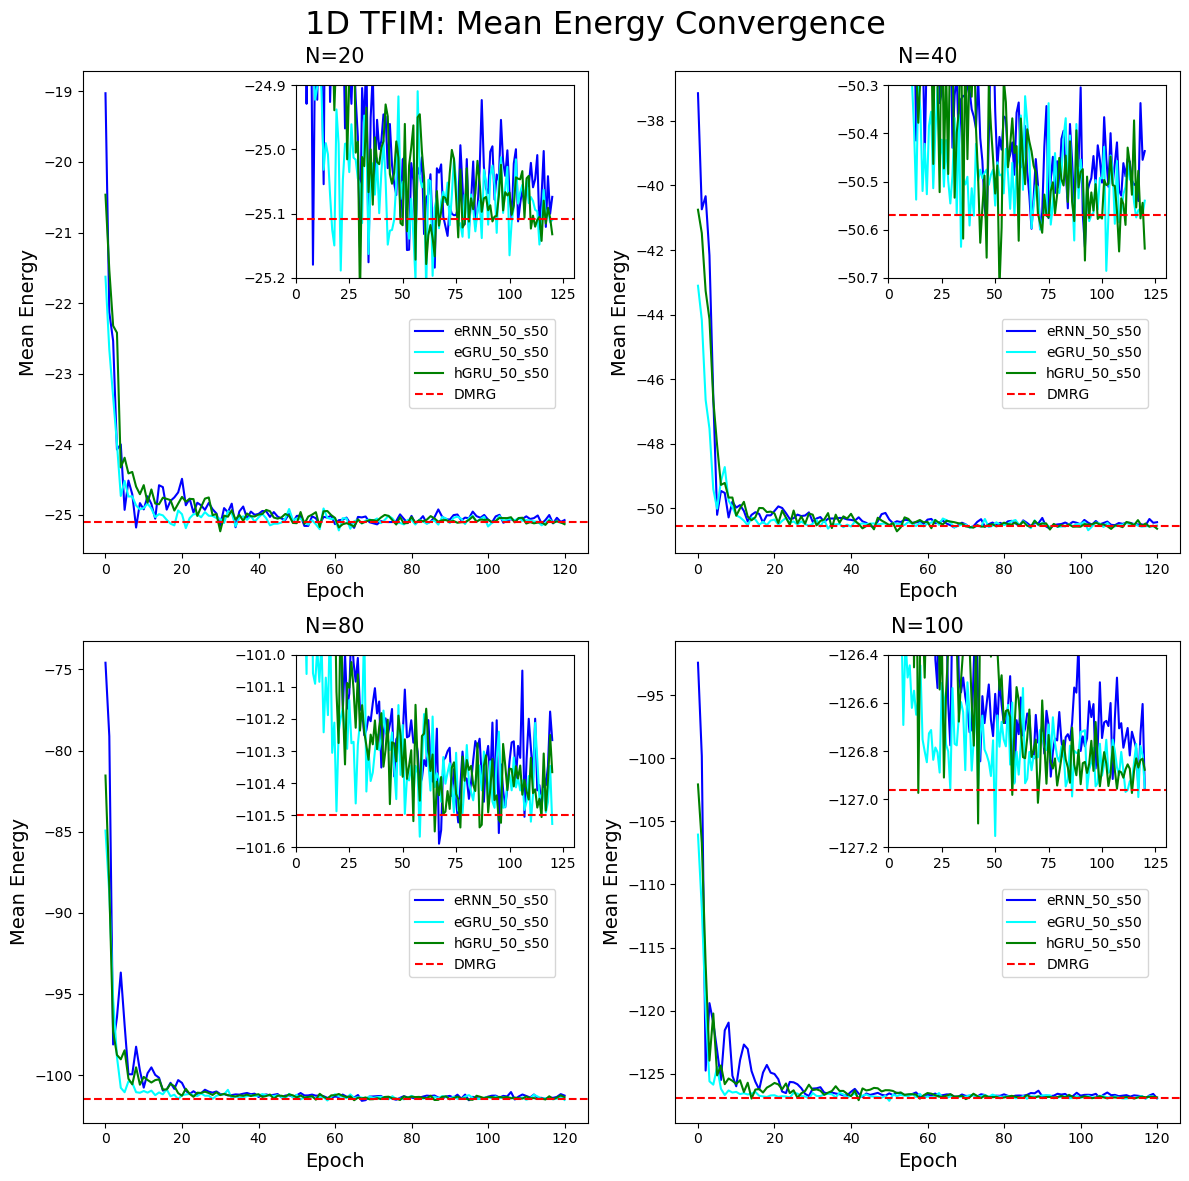

In [4]:
fig, ax = plt.subplots(2,2, figsize=(12, 12), tight_layout=True)
e_list20 = [mE_ernn, mE_egru,  mE_hgru]
e_list40 = [mE_ernn40, mE_egru40,  mE_hgru40]
e_list80 = [mE_ernn80, mE_egru80,  mE_hgru80]
e_list100 = [mE_ernn100, mE_egru100,  mE_hgru100]
e_names = ['eRNN_50_s50', 'eGRU_50_s50', 'hGRU_50_s50']
plot_res_meanE(ax[0,0], Ee_20, e_list20, e_names, 20, [0,130, -25.2, -24.9], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[0,1], Ee_40, e_list40, e_names, 40, [0,130, -50.7, -50.3], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[1,0], Ee_80, e_list80, e_names, 80, [0,130, -101.6, -101.], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[1,1], Ee_100, e_list100, e_names, 100, [0,130, -127.2, -126.4], (0.15, 0.3, 0.8, 0.2))

plt.suptitle('1D TFIM: Mean Energy Convergence', fontsize = 23)
plt.savefig('1dTFIM_all_N_ns50_nu50.png')

/var/folders/vj/tcj17zdj6tj91hbjgpptsj680000gn/T/ipykernel_27332/2877978903.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('1dTFIM_all_N_ns50_nu50_var.png')


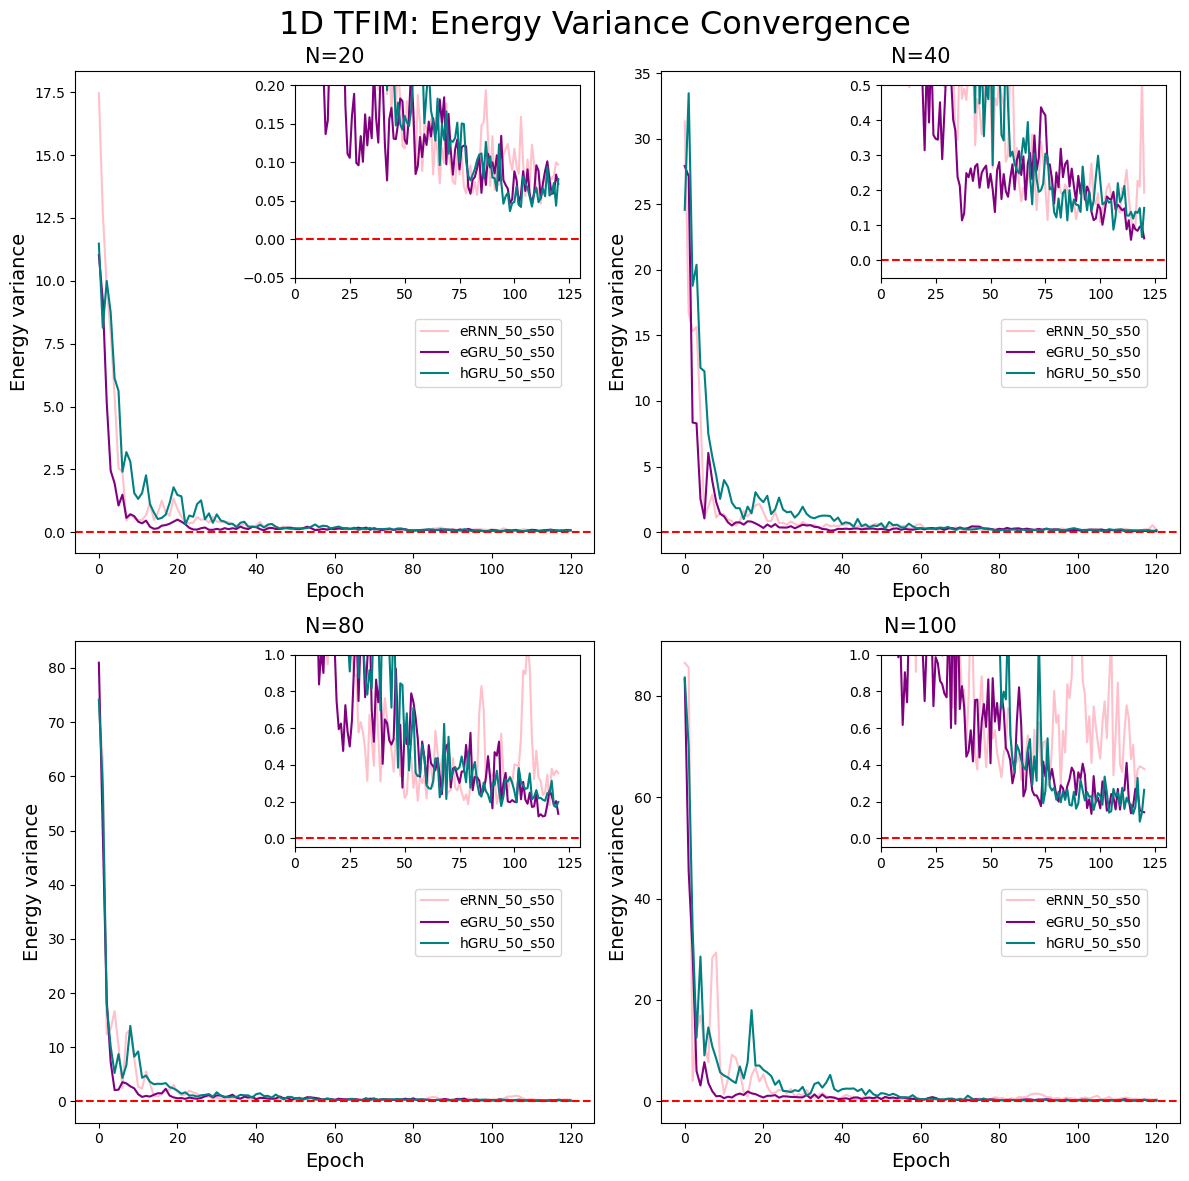

In [5]:
fig, ax = plt.subplots(2,2, figsize=(12, 12), tight_layout=True)
v_list20 = [vE_ernn, vE_egru,  vE_hgru]
v_list40 = [vE_ernn40, vE_egru40,  vE_hgru40]
v_list80 = [vE_ernn80, vE_egru80,  vE_hgru80]
v_list100 = [vE_ernn100, vE_egru100,  vE_hgru100]
plot_res_var(ax[0,0], v_list20, e_names, 20, [0,130, -0.05, 0.2],(0.15, 0.3, 0.8, 0.2))
plot_res_var(ax[0,1], v_list40, e_names, 40,[0,130, -0.05, 0.5],(0.15, 0.3, 0.8, 0.2))
plot_res_var(ax[1,0], v_list80, e_names, 80, [0,130, -0.05, 1.0],(0.15, 0.3, 0.8, 0.2))
plot_res_var(ax[1,1], v_list100, e_names, 100, [0,130, -0.05, 1.0], (0.15, 0.3, 0.8, 0.2))

plt.suptitle('1D TFIM: Energy Variance Convergence', fontsize = 23)
plt.savefig('1dTFIM_all_N_ns50_nu50_var.png')